# Working with other data

In [1]:
import tensorflow as tf

# Basic Mechanics

In [2]:
# Create a simple 1D tensor and make it consumable for TensorFlow

#create a 1D tensor

ds = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
ds.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

In [3]:
# iterate and display tensor values

for elem in ds:
  print(elem.numpy())

8
3
0
8
2
1


In [4]:
# iterate without numpy method

for elem in ds:
  print(elem)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [5]:
# Creating a python iterator and comsume its elements with the next method

it = iter(ds)

In [6]:
#Display the first element
next(it).numpy()

8

In [7]:
# Creating a tensor with tf.data.Dataset_from_tensors()

#create a 1D tensor

ds = tf.data.Dataset.from_tensors([8,3,0,8,2,1])
ds.element_spec

TensorSpec(shape=(6,), dtype=tf.int32, name=None)

In [8]:
# iterate and display tensor values

for elem in ds:
  print(elem.numpy())

[8 3 0 8 2 1]


In [9]:
#iterate without numpy method

for elem in ds:
  print(elem)

tf.Tensor([8 3 0 8 2 1], shape=(6,), dtype=int32)


# TensorFlo Dataset Structure

In [10]:
br = "\n"

In [11]:
# create random uniform numbers

scope = tf.random.uniform([4,10])
print("shape:",scope.shape,br)

shape: (4, 10) 



In [12]:
ds = tf.data.Dataset.from_tensor_slices(scope)
print(ds.element_spec,br)

TensorSpec(shape=(10,), dtype=tf.float32, name=None) 



In [13]:
#Veiwing the first element

it = iter(ds)

#printing the first element

print("first element with an iterator:",br)
print(next(it).numpy(),br)

first element with an iterator: 

[0.98673904 0.99986744 0.93803644 0.1413523  0.36378968 0.6717683
 0.15809095 0.7178863  0.20597208 0.860656  ] 



In [14]:
#printing all four elements

print("all four elements:",br)

for i,row in enumerate(ds):
  print("element " + str(i+1))
  print(row.numpy(),br)

all four elements: 

element 1
[0.98673904 0.99986744 0.93803644 0.1413523  0.36378968 0.6717683
 0.15809095 0.7178863  0.20597208 0.860656  ] 

element 2
[0.67132425 0.66681254 0.67330456 0.4043411  0.43418586 0.7081752
 0.8783684  0.34433186 0.7223797  0.41523528] 

element 3
[0.20200634 0.564803   0.9738151  0.8056345  0.78392184 0.8741499
 0.87803996 0.7159805  0.9592917  0.9786024 ] 

element 4
[0.5460993  0.26361942 0.515545   0.7157372  0.0995568  0.99035835
 0.43919885 0.20984888 0.12499905 0.2256813 ] 



# Reading Input Data

## Batch Size

## Keras Data

In [15]:
#Getting the MNIST Keras dataset
train, test = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
#Both train and test data contain MNIST images and labels in a tuple

type(train) , type(test)

(tuple, tuple)

In [17]:
#Exploring the shape of the train data

print("train data:",br)
print(train[0].shape)
print(train[1].shape)

train data: 

(60000, 28, 28)
(60000,)


In [18]:
#Exploring the shape of the test data

print("test data:",br)
print(test[0].shape)
print(test[1].shape)

test data: 

(10000, 28, 28)
(10000,)


# Build the input pipeline 

In [19]:
#Split train and test data into their repsective images and labels. Scale image data. Create TensorFlow consumable data with the from_tensor_slices method

#Starting with the train data

train_images, train_labels = train
train_sc = train_images / 255 # to scale


In [20]:
train_k = tf.data.Dataset.from_tensor_slices((train_sc, train_labels))
train_k.element_spec

(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

In [21]:
# Doing the same with the test data

test_images, test_labels = test

test_sc = test_images / 255 # to scale

test_k = tf.data.Dataset.from_tensor_slices((test_sc,test_labels))
test_k

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [22]:
# Shuffle train data, batch and prefetch train and test data

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1000


train_kd = train_k.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_kd = test_k.batch(BATCH_SIZE).prefetch(1)

In [23]:
# Inspecting tensors
train_kd, test_kd

(<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>)

# Create the Model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [25]:
#Clear previous models from memory

tf.keras.backend.clear_session()

In [26]:
#Build the model

model = Sequential([Flatten(input_shape=[28,28]),Dense(512,activation="relu"),Dropout(0.5),Dense(10,activation="softmax")])

# Model Summary

In [27]:
#Display a summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [28]:
#compiling 

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the model

In [29]:
epochs = 10
history = model.fit(train_kd,epochs=epochs, verbose=1,validation_data=test_kd)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.3331 - accuracy: 0.9046 - val_loss: 0.1552 - val_accuracy: 0.9540
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9532 - val_loss: 0.1100 - val_accuracy: 0.9652
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9650 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9707 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9747 - val_loss: 0.0740 - val_accuracy: 0.9770
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9773 - val_loss: 0.0717 - val_accuracy: 0.9772
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9794 - val_loss: 0.0695 - val_accuracy: 0.9779
Epoch 

# Scikit-Learn Data

In [30]:
# grabbing a dataset from the scikit learn lib

from sklearn.datasets import fetch_lfw_people


In [31]:
faces = fetch_lfw_people(min_faces_per_person=70,resize=0.4)

# Explore the Data

In [32]:
# Get available keys from dataset

faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [33]:
#displaying the shapes target names and class labels

image , target = faces.images , faces.target

data = faces.data
names = faces.target_names

In [34]:
print("feature image tensor:",br)
print(image.shape,br)
print("target tensor:",br)
print(target.shape,br)
print("flattened image tensor:",br)
print(data.shape,br)
print("target names:",br)
print(names,br)
print("class labels: ",len(names))

feature image tensor: 

(1288, 50, 37) 

target tensor: 

(1288,) 

flattened image tensor: 

(1288, 1850) 

target names: 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair'] 

class labels:  7


In [35]:
# display the first data example

i = 0

print("first image example: ",br)
print(image[i],br)

print("first target example: ",br)
print(target[i],br)

print("name of first target: ",br)
print(names[target[i]],br)

print("first data example (flattened image):",br)
print(data[i],br)



first image example:  

[[254.       254.       251.66667  ...  65.333336  50.666668  40.333332]
 [253.33333  251.33333  247.33333  ...  66.666664  52.        42.666668]
 [240.66667  231.66667  211.66667  ...  62.        49.        42.      ]
 ...
 [ 74.333336  54.        31.666666 ...  97.666664  93.        90.      ]
 [ 65.333336  47.        30.333334 ...  91.666664  92.        86.333336]
 [ 59.333332  44.333332  32.333332 ...  87.333336  88.666664  86.666664]] 

first target example:  

5 

name of first target:  

Hugo Chavez 

first data example (flattened image): 

[254.       254.       251.66667  ...  87.333336  88.666664  86.666664] 



Text(0.5, 1.0, 'Hugo Chavez')

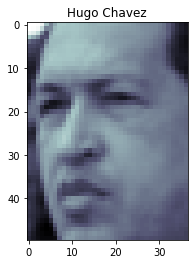

In [36]:
import matplotlib.pyplot as plt
#display the first image in the dataset

plt.imshow(image[i],cmap="bone")
plt.title(names[target[i]])

# Build the input pipeline

In [37]:
# Create train and test sets

from sklearn.model_selection import train_test_split

In [38]:
# Create train and test data

X_train, X_test, y_train, y_test = train_test_split(image,target, test_size=0.33,random_state=0)

In [39]:
#scale feature image data and create TensorFlow tensors

x_train = X_train/255.0
x_test = X_test /255.0

In [40]:
# get shapes
print("x_train shape: ",end=" ")
print(x_train.shape)
print("x_test shape: ",end=" ")
print(x_test.shape)

x_train shape:  (862, 50, 37)
x_test shape:  (426, 50, 37)


In [41]:
# get sample entries

print(x_train[0])
print(X_train[0][0][0])
print(x_train[0][0][0])

[[0.35424837 0.3895425  0.44575164 ... 0.5816993  0.55947715 0.6       ]
 [0.3712418  0.4013072  0.45620915 ... 0.64052284 0.5647059  0.5346405 ]
 [0.3647059  0.40392157 0.46666667 ... 0.6431373  0.593464   0.49673203]
 ...
 [0.81830066 0.7124183  0.50980395 ... 0.10326798 0.10196079 0.10849673]
 [0.8496732  0.85490197 0.779085   ... 0.09411765 0.09803922 0.10588235]
 [0.848366   0.8771242  0.89542484 ... 0.09150327 0.09803922 0.10588235]]
90.333336
0.35424837


In [42]:
# slicing data into TensorFlow consumable pieces

faces_train = tf.data.Dataset.from_tensor_slices((X_train,y_train))

In [43]:
faces_test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [44]:
#Set batch and buffer sizes

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

In [45]:
#Shuffle train data, batch and prefetch train and test data

faces_train_ds = (faces_train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1))
faces_test_ds = (faces_test.batch(BATCH_SIZE).prefetch(1))

In [46]:
#Inspect tensors

faces_train_ds,faces_test_ds

(<PrefetchDataset shapes: ((None, 50, 37), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 50, 37), (None,)), types: (tf.float32, tf.int64)>)

# Build the Model

In [47]:
#Build a simple model and train the data
import numpy as np
class_labels = len(names)


In [48]:
#clear previous model and generate a seed
tf.keras.backend.clear_session()

In [49]:
np.random.seed(0)
tf.random.set_seed(0)

In [50]:
model = Sequential([Flatten(input_shape=[50,37]),Dense(16,activation="relu"),Dense(class_labels,activation="softmax")])

# Model Summary

In [51]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1850)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                29616     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 29,735
Trainable params: 29,735
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [52]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the Model

In [53]:
#train

history = model.fit(faces_test_ds,epochs=10,validation_data=faces_test_ds)

Epoch 1/10
27/27 [==============================] - 0s 7ms/step - loss: 51.8794 - accuracy: 0.3286 - val_loss: 1.9369 - val_accuracy: 0.4085
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 1.9318 - accuracy: 0.4085 - val_loss: 1.9261 - val_accuracy: 0.4085
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 1.9209 - accuracy: 0.4085 - val_loss: 1.9151 - val_accuracy: 0.4085
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 1.9100 - accuracy: 0.4085 - val_loss: 1.9043 - val_accuracy: 0.4085
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 1.8992 - accuracy: 0.4085 - val_loss: 1.8937 - val_accuracy: 0.4085
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 1.8887 - accuracy: 0.4085 - val_loss: 1.8833 - val_accuracy: 0.4085
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 1.8785 - accuracy: 0.4085 - val_loss: 1.8733 - val_accuracy: 0.4085
Epoch 8/10
27/27 [=

# Numpy Data

In [54]:
#Loading numpy data directly and scale it

DATA_URL = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"

path = tf.keras.utils.get_file("mnist.npz",DATA_URL)
with np.load(path) as data:
  train_examples = data["x_train"]
  train_labels = data["y_train"]
  test_examples = data["x_test"]
  test_labels = data["y_test"]

train_scaled = train_examples / 255.
test_scaled = test_examples / 255.

# Load numpy Arrays with tf.data.Dataset

In [55]:
#Convert train and test images and labels to a TensorFlow consumable form

train_dataset = tf.data.Dataset.from_tensor_slices((train_scaled,train_labels))

test_dataset = tf.data.Dataset.from_tensor_slices((test_scaled,test_labels))

# Prepare Data for Training

In [56]:
#Shuffle train data, batch, and prefetch train and test data

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1000

In [57]:
train_np = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_np = test_dataset.batch(BATCH_SIZE).prefetch(1)

In [58]:
#Inspect tensors

train_np,test_np

(<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>)

# Create the Model

In [59]:
# Clear previous sessions and set random seeds

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [60]:
# Use the same model we used with Keras MNIST

model = Sequential([Flatten(input_shape=[28,28]),Dense(512,activation="relu"),Dropout(0.5),Dense(10,activation="softmax")])

# Model Summary

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [62]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the Model

In [63]:
history = model.fit(train_np,epochs=10,verbose=1,validation_data=test_np)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3372 - accuracy: 0.9006 - val_loss: 0.1578 - val_accuracy: 0.9518
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1604 - accuracy: 0.9526 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1199 - accuracy: 0.9642 - val_loss: 0.0937 - val_accuracy: 0.9708
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0968 - accuracy: 0.9707 - val_loss: 0.0810 - val_accuracy: 0.9746
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0845 - accuracy: 0.9734 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.0728 - val_accuracy: 0.9767
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0642 - accuracy: 0.9800 - val_loss: 0.0690 - val_accuracy: 0.9784
Epoch 

# Getting Wine Data from Github

In [64]:
url = "https://raw.githubusercontent.com/paperd/tensorflow/master/chapter4/data/winequality-red.csv"

In [65]:
# Read the dataset into a pandas dataframe

import pandas as pd

wine = pd.read_csv(url, sep = ";")

In [66]:
# Verify that data was read properly

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# CSV Data

## Get Data

In [67]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [68]:
# Establish the path to the dataset

path = tf.keras.utils.get_file("winequality-red.csv",url)
path

98304/84199 [===================================] - 0s 3us/step


'/root/.keras/datasets/winequality-red.csv'

In [69]:
# Create a pandas dataframe from the csv file and place it into a Python variable

import pandas as pd

data = pd.read_csv(path, sep = ";")

In [70]:
# Viewing records from the beginning of the dataframe

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
# View records from the end of the dataframe

data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [72]:
# Identify class labels that appear in the dataset

data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [73]:
#Display datatypes

data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [74]:
# Display the number of examples in the dataset

len(data)

1599

# Split data into Train and test sets

In [75]:
# create a copy of the dataframe

df = data.copy()

In [76]:
# create the target

target = df.pop("quality")

In [77]:
#Viewing the dataframe after the pop

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [78]:
# Convert the dataframe to numpy values

features = df.values

In [79]:
labels = target.values

In [80]:
#Split into train and test sets, and scale feature data

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=0) 

In [81]:
#scale feature data and create TensorFlow tensors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Prepare Data for TensorFlow Consumption

In [82]:
#Slice train and test sets into tf.Data.Dataset data

train_wine = tf.data.Dataset.from_tensor_slices((X_train_std,y_train))
test_wine = tf.data.Dataset.from_tensor_slices((X_test_std,y_test))

In [83]:
# Define the variable to hold line break
br = "\n"

In [84]:
#Create a function to view tensors


def see_samples(data,num):
  for feat, targ in data.take(num):
    print("Features: {}".format(feat))
    print("Target: {}".format(targ),br)

In [85]:
# View the first three tensors

see_samples(train_wine,3)

Features: [ 3.79780175 -1.73659008  0.8570712  -0.23338227 -0.25461043 -0.58015323
 -0.67883538  1.73432547 -1.55136219  1.01399624 -1.14014938]
Target: 7 

Features: [-0.36423038 -1.46457323  0.14233674 -0.56361403 -0.57266001  0.34350384
 -0.26605017 -0.96681652 -0.12478467 -1.08185338  0.35801792]
Target: 6 

Features: [ 2.60050484 -0.97494291  1.1123335   2.14428637 -0.43351332 -1.04198176
 -0.35450415  2.44239181 -0.70838456 -0.00560628  1.4816434 ]
Target: 7 



In [86]:
# Define batch and buffer sizes

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

In [87]:
#Shuffle train data, batch, and prefetch train and test data

train_wine_ds = (train_wine.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1))
test_wine_ds = (test_wine.batch(BATCH_SIZE).prefetch(1))

In [88]:
# Inspect tensors

train_wine_ds, test_wine_ds

(<PrefetchDataset shapes: ((None, 11), (None,)), types: (tf.float64, tf.int64)>,
 <PrefetchDataset shapes: ((None, 11), (None,)), types: (tf.float64, tf.int64)>)

# Build the model

In [89]:
#clear sessions and generate seeds

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [90]:
# Create the model

model = Sequential([Dense(30,activation="relu",input_shape=[11,]),Dense(11,activation="softmax")])

# Model Summary 

In [91]:
#Inspect the model:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                341       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [92]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the model

In [93]:
history = model.fit(train_wine_ds,epochs=10,validation_data=test_wine_ds)

Epoch 1/10
67/67 [==============================] - 1s 4ms/step - loss: 2.3061 - accuracy: 0.1755 - val_loss: 1.8832 - val_accuracy: 0.4754
Epoch 2/10
67/67 [==============================] - 0s 3ms/step - loss: 1.6365 - accuracy: 0.5322 - val_loss: 1.4151 - val_accuracy: 0.5682
Epoch 3/10
67/67 [==============================] - 0s 3ms/step - loss: 1.3104 - accuracy: 0.5621 - val_loss: 1.2116 - val_accuracy: 0.5871
Epoch 4/10
67/67 [==============================] - 0s 3ms/step - loss: 1.1627 - accuracy: 0.5808 - val_loss: 1.1236 - val_accuracy: 0.5890
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.5882 - val_loss: 1.0786 - val_accuracy: 0.5871
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.5920 - val_loss: 1.0549 - val_accuracy: 0.5890
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 1.0178 - accuracy: 0.5948 - val_loss: 1.0385 - val_accuracy: 0.5852
Epoch 8/10
67/67 [==

# Getting Abalone Data from Github

In [94]:
url = "https://raw.githubusercontent.com/paperd/tensorflow/master/chapter4/data/abalone.data"

In [95]:
# Read the dataset into a pandas dataframe

#add column headings

cols = ["Sex","Length","Diameter","Height","Whole","Shucked","Viscera","Shell","Rings"]

In [96]:
abd = pd.read_csv(url,names=cols)

In [97]:
#Verify Data
abd.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Explore Data

In [98]:
# Display records from the begining of the dataset

abd.head(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [99]:
# Display records from the end of the dataset

abd.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [100]:
# Return the number of records

len(abd)

4177

In [101]:
# Display the output classes used in the dataset

# classes used

print("classes:",br)
print(np.sort(abd["Rings"].unique()))

classes: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]


In [102]:
# Display the number of output classes

# number of classes

print("number of classes:",len(abd["Rings"].unique()))

number of classes: 28


In [103]:
# Display class distribution

instance = abd["Rings"].value_counts()
instance.to_dict()

{1: 1,
 2: 1,
 3: 15,
 4: 57,
 5: 115,
 6: 259,
 7: 391,
 8: 568,
 9: 689,
 10: 634,
 11: 487,
 12: 267,
 13: 203,
 14: 126,
 15: 103,
 16: 67,
 17: 58,
 18: 42,
 19: 32,
 20: 26,
 21: 14,
 22: 6,
 23: 9,
 24: 2,
 25: 1,
 26: 1,
 27: 2,
 29: 1}

In [104]:
# Display datatypes

abd.dtypes

Sex          object
Length      float64
Diameter    float64
Height      float64
Whole       float64
Shucked     float64
Viscera     float64
Shell       float64
Rings         int64
dtype: object

In [105]:
# Display info about all columns

abd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   object 
 1   Length    4177 non-null   float64
 2   Diameter  4177 non-null   float64
 3   Height    4177 non-null   float64
 4   Whole     4177 non-null   float64
 5   Shucked   4177 non-null   float64
 6   Viscera   4177 non-null   float64
 7   Shell     4177 non-null   float64
 8   Rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [106]:
# Display shape

abd.shape

(4177, 9)

# Create Train and Test Sets

In [107]:
# Split data


train,test = train_test_split(abd)

In [108]:
print(len(train)," train examples")
print(len(test), "test examples")

3132  train examples
1045 test examples


# Creating Features and Target Sets

In [109]:
# Create copy

train_copy, test_copy = train.copy(), test.copy()

In [110]:
# create targets


train_target, test_target = train_copy.pop("Rings"), test_copy.pop("Rings")

In [111]:
#Verify targets

len(train_target), len(test_target)

(3132, 1045)

In [112]:
# Verify train features 

train_copy.head(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
940,I,0.460,0.345,0.105,0.449,0.1960,0.0945,0.1265
2688,M,0.630,0.465,0.150,1.027,0.5370,0.1880,0.1760
1948,M,0.635,0.515,0.165,1.229,0.5055,0.2975,0.3535


In [113]:
# Convert features data to numpy

train_features, test_features = train_copy.values, test_copy.values

# Scale Features

In [114]:
# Display a sample to verify slicing

train_features[0],test_features[0]

(array(['I', 0.46, 0.345, 0.105, 0.449, 0.196, 0.0945, 0.1265],
       dtype=object),
 array(['M', 0.55, 0.425, 0.155, 0.9175, 0.2775, 0.243, 0.335],
       dtype=object))

In [115]:
# Create two train sets(one with sex and the other with continuous values)

train_sex = [row[0] for row in train_features]
train_f = [row[1:] for row in train_features]

train_sex[0] , train_f[0]

('I', array([0.46, 0.345, 0.105, 0.449, 0.196, 0.0945, 0.1265], dtype=object))

In [116]:
# Create two test sets(one with sex and the other with continuous values)

test_sex = [row[0] for row in test_features]
test_f = [row[1:] for row in test_features]

test_sex[0] , test_f[0]

('M', array([0.55, 0.425, 0.155, 0.9175, 0.2775, 0.243, 0.335], dtype=object))

In [117]:
# Scale continuous values

train_sc = scaler.fit_transform(train_f)
test_sc = scaler.fit_transform(test_f)

# Create Train and test Sets with Sex and Scaled Values

In [118]:
# Since we've scaled the continuous values we need to recombine them with the sex feature

train_ds  = [np.append(train_sex[i],row ) for i , row in enumerate(train_sc)]

test_ds = [np.append(test_sex[i], row) for i, row in enumerate(test_sc)]

train_ds[0], test_ds[0]

(array(['I', '-0.5539720150785379', '-0.6559333602766398',
        '-0.8211004378454012', '-0.7927915873345437',
        '-0.7526317555313695', '-0.8016001909009411',
        '-0.8252762430150634'], dtype='<U32'),
 array(['M', '0.2614317441034712', '0.21602505424971047',
        '0.44367952533410815', '0.23087500908915165',
        '-0.32043732600158525', '0.6054586014932206', '0.7419788416599444'],
       dtype='<U32'))

# Convert Numpy Features Sets into Pandas DataFrames

In [119]:
col = ["Sex","Length","Diameter","Height","Whole","Shucked","Viscera","Shell"]

In [120]:
train_ab = pd.DataFrame(train_ds,columns=col)
test_ab = pd.DataFrame(test_ds,columns=col)

In [121]:
#Verify train features

train_ab.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
3129,M,0.5789990955701353,0.41185984745829424,0.11456868033972055,0.24918336699361837,0.4509756980247627,0.22340827110437553,0.08812680029658754
3130,F,0.8307704534920629,0.8186382123096974,0.5824032394322819,0.5924221754781892,0.5140862012074815,0.49796410914151396,0.5556165468734168
3131,I,-0.9735909449484174,-0.8593225427023411,-0.7041417980722608,-1.0440914292607475,-1.038882966395843,-0.9800614856250811,-1.008676066672127


In [122]:
# Verify test features

test_ab.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
1042,M,-0.18716624044189956,-0.02977871501307618,-0.45710197003615755,-0.2913686639789352,-0.3970492055291762,-0.1367960937670394,-0.2984126317100943
1043,M,0.9955011733595315,1.0517578697431864,0.8297287376356508,1.1534377622911416,0.9842179165418012,1.184779339257326,1.2729372487591362
1044,F,0.7100297286488411,0.7076325927752842,0.7010456668684699,0.5123176111122258,0.38033604261843734,0.3927392680954632,0.8998313410678125


# Build the Input Pipeline

In [123]:
# Prepare train and test data for TensorFlows consumption

train_ds = tf.data.Dataset.from_tensor_slices((dict(train_ab),train_target))
test_ds = tf.data.Dataset.from_tensor_slices((dict(test_ab),test_target))

In [124]:
# Shuffle train data, batch and prefetch train and test data


BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_ads = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_ads = test_ds.batch(BATCH_SIZE).prefetch(1)

train_ads , test_ads

(<PrefetchDataset shapes: ({Sex: (None,), Length: (None,), Diameter: (None,), Height: (None,), Whole: (None,), Shucked: (None,), Viscera: (None,), Shell: (None,)}, (None,)), types: ({Sex: tf.string, Length: tf.string, Diameter: tf.string, Height: tf.string, Whole: tf.string, Shucked: tf.string, Viscera: tf.string, Shell: tf.string}, tf.int64)>,
 <PrefetchDataset shapes: ({Sex: (None,), Length: (None,), Diameter: (None,), Height: (None,), Whole: (None,), Shucked: (None,), Viscera: (None,), Shell: (None,)}, (None,)), types: ({Sex: tf.string, Length: tf.string, Diameter: tf.string, Height: tf.string, Whole: tf.string, Shucked: tf.string, Viscera: tf.string, Shell: tf.string}, tf.int64)>)

# Explore a Batch

In [127]:
def see_format(data,num,feature,indx):
  for feature_batch, label_batch in data.take(num):
    print("Every feature:", list(feature_batch.keys()))
    print("One example from a batch of " + feature + ":", feature_batch[feature][indx])
    print("One example from a batch of targets:" , label_batch[indx])

In [129]:
print("Train sample")
see_format(train_ads, 1, "Height",0)
print()
print("test sample")
see_format(test_ads,1,"Sex",0)

Train sample
Every feature: ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']
One example from a batch of Height: tf.Tensor(b'0.11456868033972055', shape=(), dtype=string)
One example from a batch of targets: tf.Tensor(9, shape=(), dtype=int64)

test sample
Every feature: ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']
One example from a batch of Sex: tf.Tensor(b'M', shape=(), dtype=string)
One example from a batch of targets: tf.Tensor(13, shape=(), dtype=int64)


# Categorical Columns

In [130]:
from tensorflow import feature_column

In [131]:
sex_one_hot = feature_column.categorical_column_with_vocabulary_list("Sex", ["M","F","I"])
print(sex_one_hot)

VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('M', 'F', 'I'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [132]:
feature_columns = [tf.feature_column.indicator_column(sex_one_hot)]

In [133]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Build the model

In [134]:
# Clear session and generate a seed


tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [135]:
# Create the model

model = tf.keras.Sequential([feature_layer, Dense(128,activation="relu"),Dense(128,activation="relu"),Dense(29,activation="sigmoid")])

# Compile the Model

In [136]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the Model

In [137]:
#Train

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

model.fit(train_ads,validation_data=test_ads,epochs=1)

98/98 [==============================] - 1s 4ms/step - loss: 2.6792 - accuracy: 0.1762 - val_loss: nan - val_accuracy: 0.1770
